# Аналіз набору даних новобудов у місті Київ

Для створення актуального набору даних із достатньою кількістю категоріальних критеріїв було створено скрапер за допомогою технології Puppeteer.

Дані збираються з веб-сайту lun.ua - найпопулярнішого агрегатору даних про новобудови в Україні.

Для аналізу набору даних використовується бібліотека pandas.

Ціллю збору даних є використання їх для тренування нейронної мережі яка моделює вартість заданого обʼєкту нерухомості із певними характеристками.

#### Словник

Характеристики обʼєкту (англ. Features) - характеристики з яких будуть обрані залежні та незалежні змінні для тренування моделі для знаходження залежності незалежних змінних від залежних.

Форма (англ. Shape) - описана через формат (N, M) де N - кількість рядків, M - кількість комірок

Теплова карта (англ. Heatmap) - формат візуалізації даних кореляції між характеристиками набору даних

#### Предметна Область

##### Залежні змінні/ Незалежні змінні

Залежною змінною є ціна на обʼєкт нерухомості.
Незалежними змінними є множина характеристик обʼєкту нерухомості що включає в себе дискретні дані та категоріальні критерії.

## Ініціалазація бібліотеки Pandas

In [2]:
import pandas as pd
# бібліотека використовується для візуалізації характеристик набору даних та візуалізацій залежності між змінними
import matplotlib.pylab as plt
# бібліотека для візуалізації кореляції між характеристиками у вигляді теплової карти
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Форма набору даних

In [3]:
df = pd.read_csv('./real-estate.csv')
df.shape

(3459, 17)

## Приклад обʼєктів з набору даних

In [5]:
df.head(3)

,residence,developer,attributes/class,attributes/construction_technology,attributes/walls,attributes/insulation,attributes/heating,attributes/num_apartments,attributes/state,attributes/protected_area,attributes/parking,financials/installmentPlan,financials/installmentPlanTerm,pricePerUnit,price,area,rooms
0,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,116825.0,5023475.0,43,1
1,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,116825.0,6308550.0,54,1
2,ЖК Montreal House,Alliance Novobud,бізнес,монолітно-каркасна,цегла,мінеральна вата,автономне (в будинку),328,без ремонту,від авто та сторонніх,підземний з ліфтом (187 паркомісць),True,1.0,116825.0,5958075.0,51,1


## Ознайомлення із набором даних

### Серія всіх характеристик обʼєкту нерухомості

In [10]:
pd.DataFrame(data=df.columns, columns=['Характеристка обʼєкту нерухомості'])

,Характеристка обʼєкту нерухомості
0,residence
1,developer
2,attributes/class
3,attributes/construction_technology
4,attributes/walls
5,attributes/insulation
6,attributes/heating
7,attributes/num_apartments
8,attributes/state
9,attributes/protected_area


### Список забудовників представлених у наборі даних

In [9]:
pd.DataFrame(data=df.developer.unique(), columns=['Забудовник'])

,Забудовник
0,Alliance Novobud
1,DIM
2,УМК
3,KSM-GROUP
4,РІЕЛ
5,IB Alliance
6,Stolitsa Group
7,Nice Development
8,Інтергал-Буд
9,Royal House


### Список класу нерухомості у наборі даних

In [ ]:
pd.DataFrame(data=dfх.unique(), columns=['Забудовник'])

## Типи даних у наборі даних

In [7]:
df.dtypes

price               int64
address            object
complex            object
hist_district      object
admin_district     object
city               object
rooms               int64
area_living       float64
area_kitchen      float64
year              float64
project            object
wall               object
currency           object
bad_proposal        int64
dtype: object

## Приведення всіх цін до USD

Так як в наборі даних ціни вказані у двох різних валютах UAH/USD, перед тренуванням моделі потрібно привести всі ціни до однієї валюти - USD.
Валюта обрана саме як USD для більш компактних значень які можуть бути легше інтерпретовані у Гістограмі.

In [8]:
DOLLAR_EXCHANGE_RATE=36.56

df.loc[df['currency'] == 'UAH', 'price'] = df['price'] / DOLLAR_EXCHANGE_RATE
df['currency'] = 'USD'

In [9]:
# ціни та валюта після змін
df[['price', 'currency']]

,price,currency
0,51024.890591,USD
1,90000.000000,USD
2,330000.000000,USD
3,82000.000000,USD
4,42000.000000,USD
...,...,...
14061,80000.000000,USD
14062,58000.000000,USD
14063,60000.000000,USD
14064,240000.000000,USD


## Фільтрація обʼєктів із недійсними значеннями що є важливими для тренування

### Пусті значення

In [10]:
# початкова форма набору даних
df.shape

(14066, 14)

In [11]:
df.isna().sum()

price                0
address              0
complex           6112
hist_district       91
admin_district       0
city                 2
rooms                0
area_living       2623
area_kitchen      1895
year              1251
project           1000
wall               439
currency             0
bad_proposal         0
dtype: int64

In [12]:
# фільтрація обʼєктів нерухомості у яких відсутня жила площа
df = df.loc[~df['area_living'].isna()]
df.shape

(11443, 14)

In [13]:
# фільтрація обʼєктів нерухомості у яких відсутня площа кухні
df = df.loc[~df['area_kitchen'].isna()]
df.shape

(11292, 14)

### Дублікати

In [14]:
# cписок дублікатів
df.loc[df.duplicated()]

,price,address,complex,hist_district,admin_district,city,rooms,area_living,area_kitchen,year,project,wall,currency,bad_proposal
1595,162000.0,вул. Липківського (Урицька),NaN,Солом'янка,Солом'янський,Київ,2,48.0,16.0,NaN,NaN,NaN,USD,0
1689,245000.0,"вул. Заньковецької, 6",NaN,Липки,Печерський,Київ,2,45.0,10.0,1915.0,дореволюційний,цегляний будинок,USD,0
1743,62500.0,вул. Пчілки,ЖК Традиція,Позняки,Дарницький,Київ,1,18.0,18.0,NaN,NaN,NaN,USD,0
1896,125000.0,"вул. Сім’ї Прахових (Гайдара), 27",NaN,Нова забудова,Голосіївський,Київ,3,80.0,15.0,2002.0,спец. проект,монолітно-каркасний,USD,0
1931,83000.0,"вул. Миколи Ушакова, 34а",NaN,Біличі,Святошинський,Київ,3,46.0,12.0,2005.0,спец. проект,монолітно-каркасний,USD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13953,211000.0,"вул. Лейпцизька, 13","ЖК вул. Лейпцизька, 13",Печерськ,Печерський,Київ,2,45.0,16.0,2019.0,спец. проект,монолітно-каркасний,USD,0
13994,110000.0,"вул. Осокорська, 2а",ЖК Зарічний,Позняки,Дарницький,Київ,2,36.0,11.0,2019.0,спец. проект,монолітно-каркасний,USD,0
14006,74000.0,"вул. Миколи Гулака, 4",ЖК Бережанський,Пріорка,Оболонський,Київ,2,36.0,11.0,2019.0,спец. проект,монолітно-каркасний,USD,0
14011,63900.0,"Дніпровська наб., 16д",ЖК Seven,Позняки,Дарницький,Київ,1,17.0,18.0,2019.0,спец. проект,монолітно-каркасний,USD,0


In [15]:
# очистка набору даних від дублікатів
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()
# форма набору даних після очистки
df.shape

(11038, 14)

### Недійсні дані

In [16]:
# фільтрація обʼєктів з нереалістичною жилою площею
df = df.query('area_living > 5')

## Опис набору даних

In [17]:
df.describe()

,price,rooms,area_living,area_kitchen,year,bad_proposal
count,1.103200e+04,11032.000000,11032.000000,11032.000000,10048.000000,11032.000000
mean,1.680171e+05,2.345903,44.024172,15.403615,1997.377389,0.118836
std,2.930271e+05,1.113455,32.172733,10.060026,26.021962,0.323610
min,1.478392e+04,1.000000,6.000000,1.000000,1858.000000,0.000000
25%,6.400821e+04,1.000000,23.500000,9.000000,1983.000000,0.000000
50%,9.500000e+04,2.000000,37.600000,13.000000,2008.000000,0.000000
75%,1.700000e+05,3.000000,53.000000,18.000000,2017.000000,0.000000
max,8.134500e+06,18.000000,450.000000,215.000000,2022.000000,1.000000


# Візуалізація головних характеристик набору даних

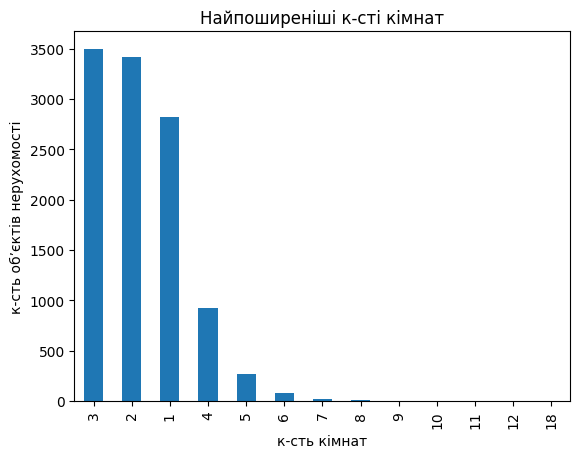

In [18]:
ax = df['rooms'].value_counts().plot(kind='bar', title='Найпоширеніші к-сті кімнат')
ax.set_xlabel('к-сть кімнат')
ax.set_ylabel('к-сть обʼєктів нерухомості')

plt.show()

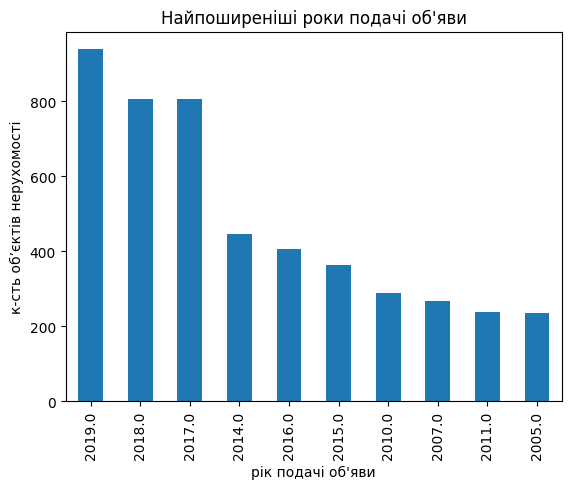

In [19]:
# рік розміщення оголошення
ax = df['year'].value_counts().head(10).plot(kind='bar', title='Найпоширеніші роки подачі об\'яви')
ax.set_xlabel('рік подачі об\'яви')
ax.set_ylabel('к-сть обʼєктів нерухомості')

plt.show()

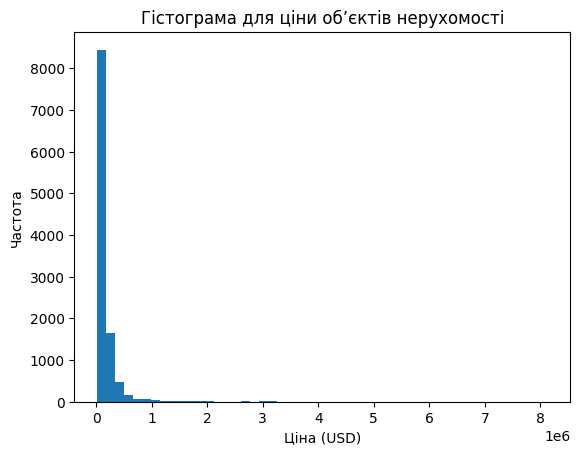

In [20]:
ax = df.copy().sort_values(by='price')['price'].head(12000).plot(kind='hist', bins=50, title='Гістограма для ціни обʼєктів нерухомості')
ax.set_xlabel('Ціна (USD)')
ax.set_ylabel('Частота')

plt.show()

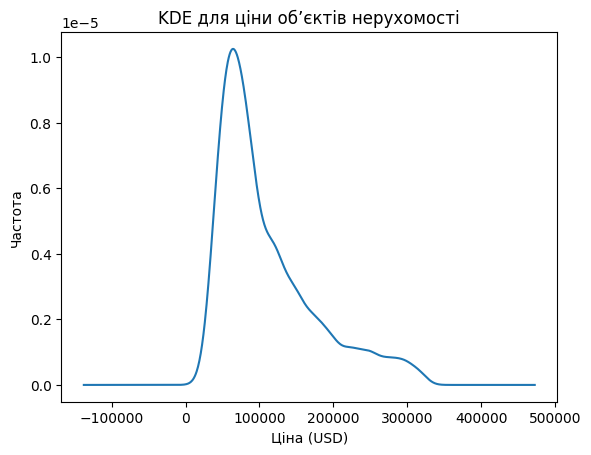

In [21]:
ax = df.copy().sort_values(by='price')['price'].head(10000).plot(kind='kde', title='KDE для ціни обʼєктів нерухомості')
ax.set_xlabel('Ціна (USD)')
ax.set_ylabel('Частота')

plt.show()

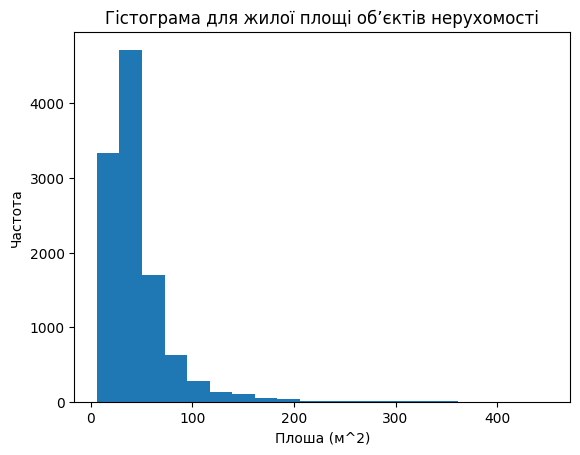

In [22]:
ax = df['area_living'].plot(kind='hist', bins=20, title='Гістограма для жилої площі обʼєктів нерухомості')
ax.set_xlabel('Плоша (м^2)')
ax.set_ylabel('Частота')

plt.show()

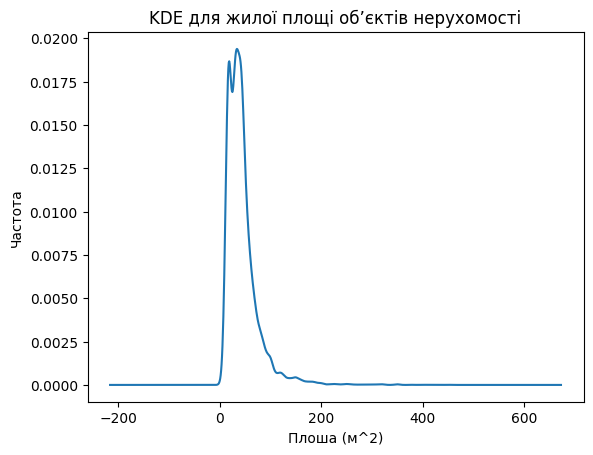

In [23]:
ax = df['area_living'].plot(kind='kde', title='KDE для жилої площі обʼєктів нерухомості')
ax.set_xlabel('Плоша (м^2)')
ax.set_ylabel('Частота')

plt.show()

# Відношення між характеристиками обʼєктів нерухомості

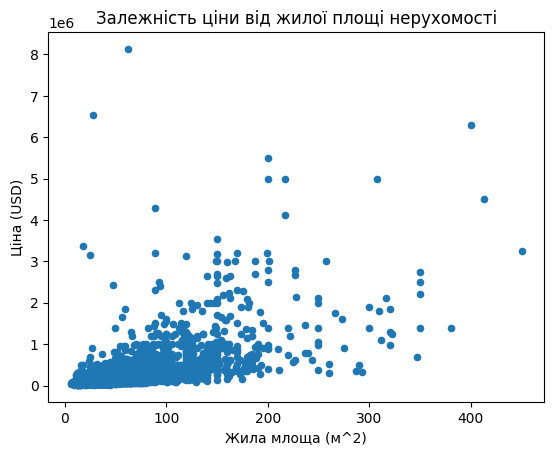

In [24]:
ax = df.plot(kind='scatter', x='area_living', y='price', title='Залежність ціни від жилої площі нерухомості')

ax.set_xlabel('Жила млоща (м^2)')
ax.set_ylabel('Ціна (USD)')

plt.show()

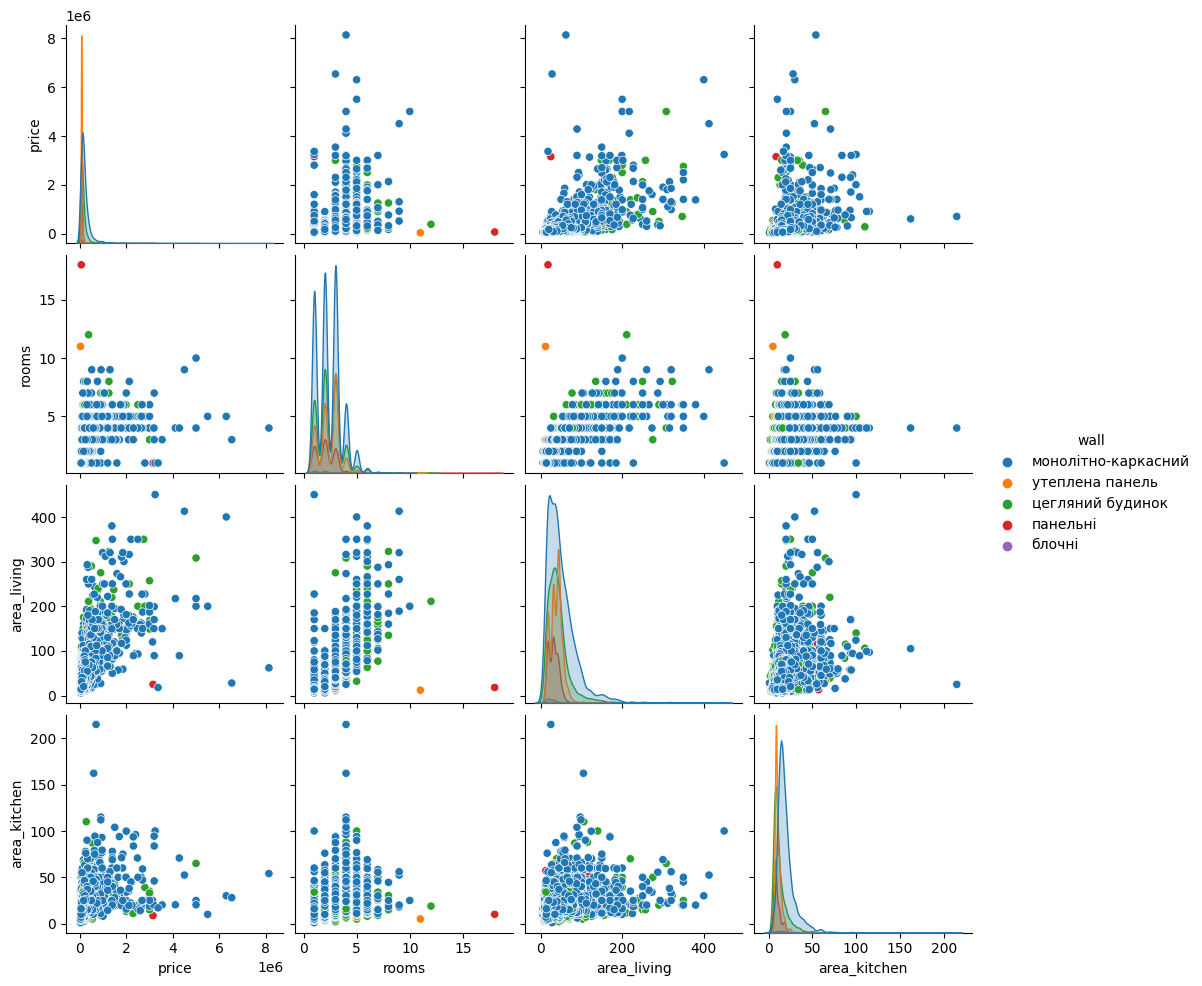

In [25]:
sns.pairplot(df, vars=[
       'price',
       'rooms',
       'area_living',
       'area_kitchen',
       ], hue='wall')

plt.show()

/var/folders/8d/rgvq80y13sj1394jhjl5vdxh0000gn/T/ipykernel_28076/3333702650.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  racorr = df.dropna().corr()


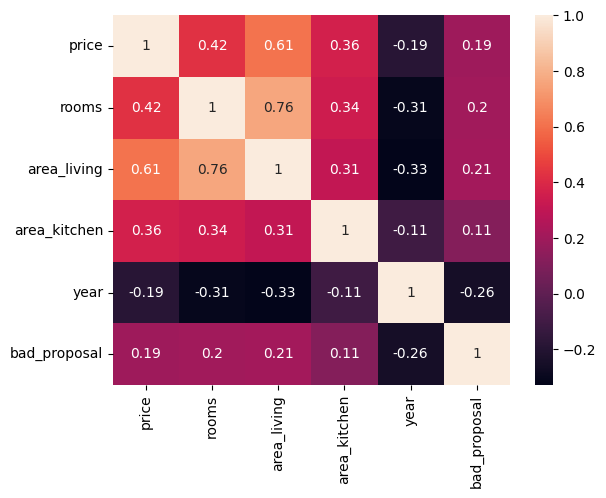

In [26]:
racorr = df[[
       'price',
       'rooms',
       'area_living',
       'area_kitchen',
       ]].dropna().corr()

sns.heatmap(data=racorr, annot=True)

plt.show()